In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In the lesson about the images, we have already encountered the idea of convolutions: a way to let the model generate features, activation maps, from the context of a 2D pixel. We did this by sliding a 'filter' over the 2D data structure, summarizing what the filter could see.

We can apply exactly the same mechanism, but this time on 1D data. We will look at the 1D context of a timeseries.
To see how the Conv1D layer works, let's have a look at a timeserie and apply different filters and kernels.

First, a note on the dimensionality. We have encountered different layers, each requiring a different dimensionality. Uptill now, we have seen as main computational layers:
- `Dense` : expecting 2D data `(batch x features)`
- `Conv2D` : expecting 4D data `(batch x width x height x channels)` (tensorflow) or `(batch x channels x width x height)`(pytorch)

To that, we will add a `Conv1D` layer. Because we don't have 2D `width x height` in a 1D case, we will shrink those two dimensions into 1D. In the case of timeseries, this dimension will be the amount of timesteps we make. That gives us:
- `Conv1D` : expecting 3D data `(batch x timesteps x channels)` [tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), `(batch x channels x timesteps)` [torch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html)

In this case, channels don't mean colors (like in the RGB images) but the will be features of the timeseries.

Let's say we want to predict the weather. We take the past 10 days (so, `window=10`). And we want to predict 1 day into the future (so, `horizon=1`). But how many features do we use? Let's say we use `temperature`, `mm rain` and `hours of sunshine`. That would give us 3 channels. So, with a batch size of 32, we will get a data shape: `(32, 3, 11)` if we keep observations and target in the same matrix, or `(32, 3, 10)` and `(32, 3, 1)` if we split them into observations $x$ and targets $\hat{y}$.

Now, lets start with some synthetic data:

In [2]:
t = torch.linspace(0, 20, 100) # 100 timesteps
noise = torch.randn(size=(100, )) * 0.2 
x = torch.sin(t) + torch.sin(2*t) + noise # a single timeserie
x = x[None, None, :] # make it have 3 dimensions
x.shape

torch.Size([1, 1, 100])

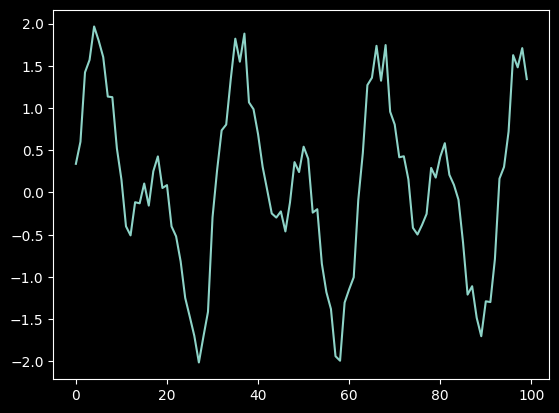

In [3]:
plt.clf()
plt.plot(x[0, 0, :])
plt.show()

Let us apply a convolution to this. We have a batchsize of 1, and 1 input channel. Let's say we want to learn 5 different filters, and we want to use a kernel of size three. This is exactly the same idea as in a 2D convolution.

In [4]:
conv = torch.nn.Conv1d(in_channels=1, out_channels=5, kernel_size=3)
out = conv(x)
y = out[0].detach().numpy()
out.shape

torch.Size([1, 5, 98])

<Figure size 640x480 with 0 Axes>

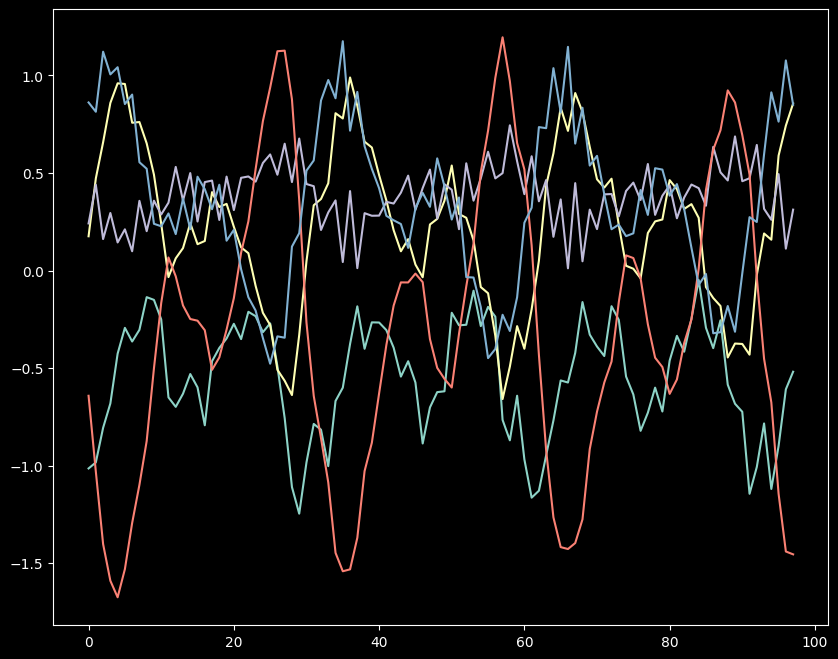

In [5]:
y = out[0].detach().numpy()
plt.clf()
plt.figure(figsize=(10, 8))
plt.plot(y.T)
plt.show()

What is going on? 
Well, the original timeserie has become modified. Sometimes it gets inverted, sometimes smoothed, some filters will exaggerate peaks, etc. This is similar to learning with the visual filters. Some filters will learn to look out for sudden rises, others will look for bounces, other filters will calculate a moving average to cancel out noise, etc.

We dont have to specify how the filters look: the model will train the filters, when we give the model a loss function and use an optimizer to figure out how to best adjust the filters.